# Data exploration

In [3]:
import pandas as pd
import numpy as np
import unidecode

In [4]:
df1 = pd.read_excel("data/asmt_assessment_instance_question.xlsx", usecols="C,M,N,U")

In [5]:
df2 = pd.read_excel("data/asmt_assessment_instance_question_comments.xlsx", usecols="C,H,I,P")

In [6]:
df = pd.concat([df1,df2])

In [7]:
df = df[df['String value'].notnull()]

In [8]:
df.groupby('Language')["Created"].count().reset_index().sort_values(ascending=False, by="Created")

,Language,Created
4,English,5600
19,Spanish,5074
0,Brazilian Portuguese,2639
5,French,1268
9,Italian,811
3,Dutch,765
6,German,496
13,Polish,484
16,Russian,366
14,Portuguese,309


### Select languages

In [7]:
df = df.query('Language in ["English", "Spanish", "Brazilian Portuguese", "Portuguese", "Mexican Spanish"]')

In [8]:
df.loc[df['Language'] == "Brazilian Portuguese", ['Language']] = 'Portuguese'
df.loc[df['Language'] == "Mexican Spanish", ['Language']] = 'Spanish'

### Format date column

In [9]:
df['Created'] =  pd.to_datetime(df['Created'], format='%Y-%m-%d %H:%M:%S').apply(lambda x: x.date())

### Remove accents and other unicode characters

In [10]:
df['String value'] = df['String value'].apply(lambda x: unidecode.unidecode(x))

### Remove puntuations, digits and lowercase the comments

In [11]:
# Remove all the special characters
df['String value'] = df['String value'].str.replace(r'\W', ' ')
# remove all single characters
df['String value'] = df['String value'].str.replace(r'\s+[a-zA-Z]\s+', ' ')
# Remove single characters from the start
df['String value'] = df['String value'].str.replace(r'\^[a-zA-Z]\s+', ' ')
# Substituting multiple spaces with single space
df['String value'] = df['String value'].str.replace(r'^\s+', ' ')
# Lowercase the strings
df['String value'] = df['String value'].str.lower()

df = df[df['String value'].notnull()]
df = df[df['String value']!=' ']
df.head(5)

,Number.1,Language,Created,String value
0,INC3019918,English,2020-08-23,david solved the issue right over the phone ca...
6,INC3019462,English,2020-08-22,excellent service thank you kevin
17,INC3018829,Spanish,2020-08-21,muy buen trato de daniel
19,INC3018713,Spanish,2020-08-21,todo perfecto gracias
49,INC3017886,English,2020-08-21,thanks for resolving helen


In [12]:
en = df[df['Language']=='English']
es = df[df['Language']=='Spanish']
po = df[df['Language']=='Portuguese']

### Remove specific words from each dataset

In [13]:
remove = ["request","ticket","issue"]
en['String value'] = en['String value'].str.replace('|'.join(remove), '')

C:\Users\perezcag\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
remove = ["ticket"]
es['String value'] = es['String value'].str.replace('|'.join(remove), '')

C:\Users\perezcag\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
remove = ["chamar", "atendimento"]
po['String value'] = po['String value'].str.replace('|'.join(remove), '')

C:\Users\perezcag\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
en.to_csv("data/en.csv", index= False)
#es.to_csv("data/es.csv", index = False)
#po.to_csv("data/po.csv", index = False)

# Topic Modeling

### Import our datasets by language

In [17]:
#es = pd.read_csv("data/es.csv")

### Remove Stop Words

In [18]:
from nltk.corpus import stopwords

In [19]:
stop = stopwords.words('english')
en['String value'] = en['String value'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

C:\Users\perezcag\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
stop = stopwords.words('spanish')
es['String value'] = es['String value'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

C:\Users\perezcag\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
stop = stopwords.words('portuguese')
po['String value'] = po['String value'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

C:\Users\perezcag\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Lemmatization

In [22]:
# Lemmatization
import spacy

In [23]:
def lemmatization(texts):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        temp = " ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc])
        # Compresses double spaces
        texts_out.append(" ".join(temp.split()))
    return texts_out
  
# Initialize spacy 'en' model
nlp = spacy.load(r'C:\Users\perezcag\AppData\Local\Programs\Python\Python36\Lib\site-packages\en_core_web_sm\en_core_web_sm-2.3.1', disable=['parser', 'ner'])
# Turn each comment in a list of words
data = en['String value'].str.strip(',').str.split(' ')
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data)

In [24]:
def lemmatization(texts):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        temp = " ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc])
        # Compresses double spaces
        texts_out.append(" ".join(temp.split()))
    return texts_out
  
# Initialize spacy 'en' model
nlp = spacy.load(r'C:/Users/perezcag/AppData/Local/Programs/Python/Python36/Lib/site-packages/es_core_news_sm/es_core_news_sm-2.3.1', disable=['parser', 'ner'])
# Turn each comment in a list of words
data = es['String value'].str.strip(',').str.split(' ')
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data)

In [25]:
def lemmatization(texts):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        temp = " ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc])
        # Compresses double spaces
        texts_out.append(" ".join(temp.split()))
    return texts_out
  
# Initialize spacy 'en' model
nlp = spacy.load(r'C:/Users/perezcag/AppData/Local/Programs/Python/Python36/Lib/site-packages/pt_core_news_sm/pt_core_news_sm-2.3.0', disable=['parser', 'ner'])
# Turn each comment in a list of words
data = po['String value'].str.strip(',').str.split(' ')
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data)

### Word Cloud

In [26]:
# Import the wordcloud library
from wordcloud import WordCloud

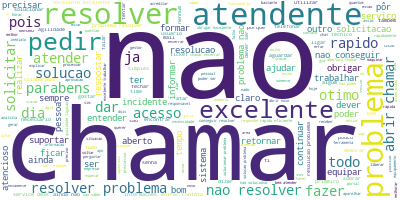

In [27]:
# Join the different processed titles together.
long_string = ','.join(list(data_lemmatized))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### Defining the best # of topics

In [28]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

In [29]:
vectorizer = CountVectorizer(analyzer='word', min_df=15)
data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [30]:
# GridSearch best LDA model - extended search

# Define Search Param
search_params = {'n_components': [3, 4, 5, 6, 7, 8, 9, 10], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation(learning_method='online',batch_size=64, max_iter=50)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params, n_jobs=-1)

# Do the Grid Search
model.fit(data_vectorized)

# Model Performance - extended

# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 3}
Best Log Likelihood Score:  -21796.2388955202
Model Perplexity:  200.24525578150195


In [31]:
import matplotlib.pyplot as plt

In [32]:
n_components = [3, 4, 5, 6, 7, 8, 9, 10]
log_likelyhoods_5 = model.cv_results_["mean_test_score"][0:8]
log_likelyhoods_7 = model.cv_results_["mean_test_score"][8:16]
log_likelyhoods_9 = model.cv_results_["mean_test_score"][16:]

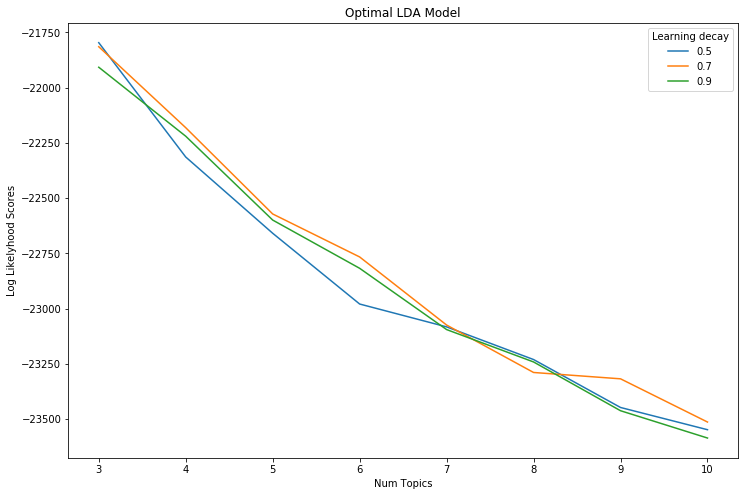

In [33]:
plt.figure(figsize=(12, 8))
plt.plot(n_components, log_likelyhoods_5, label='0.5')
plt.plot(n_components, log_likelyhoods_7, label='0.7')
plt.plot(n_components, log_likelyhoods_9, label='0.9')
plt.title("Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.savefig("optimalLDA.png")

### Generating pyLDAvis graph

In [34]:
import pyLDAvis
from pyLDAvis import sklearn as sklearn_lda

In [35]:
lda = LatentDirichletAllocation(n_components=3)
lda.fit(data_vectorized)
LDAvis_prepared = sklearn_lda.prepare(lda, data_vectorized, vectorizer)
pyLDAvis.save_html(LDAvis_prepared, r"data/en_3_topics.html")

### Dataframe with the top 10 words by topic generated

In [36]:
# Show top n keywords for each topic
def show_topics(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = [i for i in range(df_topic_keywords.shape[0])]
df_topic_keywords
df_topic_keywords.to_csv("data/en_words.csv")

In [37]:
# Create Document — Topic Matrix
lda_output = lda.transform(data_vectorized)
# column names
topicnames = ["Topic " + str(i+1) for i in range(lda.n_components)]
# index ticket number
docnames = en["Number.1"]
# Make the pandas dataframe
df_dominant_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each ticket number
df_dominant_topic['dominant_topic'] = np.argmax(df_dominant_topic.values, axis=1) + 1
df_dominant_topic.reset_index(inplace=True)
en_merged = pd.merge(en, df_dominant_topic[['String value','dominant_topic']], on='Number.1', how='inner')
en_merged.drop_duplicates(subset=['Number.1','String value'], keep='first', inplace=True)
en_merged.to_csv("data/en_topic.csv")

ValueError: Shape of passed values is (2896, 3), indices imply (5398, 3)

In [ ]:
# Create Document — Topic Matrix
lda_output = lda.transform(data_vectorized)
# column names
topicnames = ["Topic " + str(i+1) for i in range(lda.n_components)]
# index ticket number
docnames = es["Number.1"]
# Make the pandas dataframe
df_dominant_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each ticket number
df_dominant_topic['dominant_topic'] = np.argmax(df_dominant_topic.values, axis=1) + 1
df_dominant_topic.reset_index(inplace=True)
es_merged = pd.merge(es, df_dominant_topic[['Number.1','dominant_topic']], on='Number.1', how='inner')
es_merged.drop_duplicates(subset=['Number.1','String value'], keep='first', inplace=True)
es_merged.to_csv("data/es_topic.csv")

In [ ]:
# Create Document — Topic Matrix
lda_output = lda.transform(data_vectorized)
# column names
topicnames = ["Topic " + str(i+1) for i in range(lda.n_components)]
# index ticket number
docnames = po["Number.1"]
# Make the pandas dataframe
df_dominant_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each ticket number
df_dominant_topic['dominant_topic'] = np.argmax(df_dominant_topic.values, axis=1) + 1
df_dominant_topic.reset_index(inplace=True)
po_merged = pd.merge(po, df_dominant_topic[['Number.1','dominant_topic']], on='Number.1', how='inner')
po_merged.drop_duplicates(subset=['Number.1','String value'], keep='first', inplace=True)
po_merged.to_csv("data/po_topic.csv")

# Sentiment Analysis

For spanish we used pre trained model from [Elliot Hofman](https://github.com/aylliote/senti-py)

In [ ]:
import pandas as pd
from classifier import *

In [ ]:
clf = SentimentClassifier()

In [ ]:
es["Rating"] = es["String value"].apply(lambda x: clf.predict(x))

### The rating is a score from 0 to 1

In [ ]:
es.head(5)

### Some statistical data

In [ ]:
es.Rating.describe()

### Get the quantiles to determine if a comments is either a positive, negative or neutral

In [ ]:
es.quantile([.33, .66], axis = 0)

### Quantile classification.
If rating is below 1st quantile its a negative comment.    
If rating is below 2nd quantile its a neutral comment.   
If rating is greater than 2nd quantile its a positive comment.   

In [ ]:
es['Class'] = es['Rating'].apply(lambda x: "negative" if x < 0.3 else ("positive" if x > 0.7 else "neutral"))

In [ ]:
es.Class.value_counts()

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(x='Class', data=es)
plt.show()

### For english we train our model based on the tweets about six US airlines, pre classified as neutral, negative and positive

Implementation based on [Sentiment Analysis with scikit-learn](https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/) and [Sentiment Analysis with python](https://github.com/KatamAkash/Sentiment-Analysis-with-Python-NLTK-Text-Classification/blob/master/Bag%20of%20words%20of%20IMDB%20reviews-Copy1.ipynb)

### Importing the data set

In [ ]:
import re
import nltk 
%matplotlib inline

In [ ]:
data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)
plt.show()

In [ ]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

## Data Cleaning

In [ ]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

### Training the model

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

### Evaluating the Model accuracy

In [ ]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

### We have achieved an accuracy of 75.99

In [ ]:
conf_mat = confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,5))
sns.heatmap(conf_mat, annot = True)
plt.title('Confusion Matrix')
plt.show()

### Apling the model to our dataset

In [ ]:
en["Class"] = en["String value"].apply(lambda x: text_classifier.predict(vectorizer.transform([x])))
en['Class'] = [','.join(map(str, l)) for l in en['Class']]

In [ ]:
en.Class.value_counts()

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Class', data=en)
plt.show()

### Time series by language and sentiment

In [ ]:
new_df = pd.concat([es,en])

In [ ]:
new_df.head(5)

In [ ]:
new_df['Created'] = pd.to_datetime(new_df['Created'])
new_df['Created'] = new_df['Created'].dt.strftime('%Y-%m')

In [ ]:
new_df['count'] = 1
new_df = new_df.groupby(['Created','Language','Class'])['count'].sum().reset_index(name='count')

In [ ]:
new_df.sort_values(by="Created").head(10)

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(data=new_df, x='Created', y='count', hue='Class')
plt.show()

In [ ]:
new_df.to_csv("data/sentiment.csv", index=False)

In [ ]:
en